In [1]:
import os, sys

# find repo root (looks for liars_poker/ or pyproject.toml)
def find_repo_root(start_dir: str) -> str:
    cur = os.path.abspath(start_dir)
    for _ in range(6):
        if os.path.isdir(os.path.join(cur, "liars_poker")) or os.path.exists(os.path.join(cur, "pyproject.toml")):
            return cur
        parent = os.path.dirname(cur)
        if parent == cur:
            break
        cur = parent
    return os.path.abspath(os.path.join(start_dir, "..", ".."))

NB_DIR = os.getcwd()
REPO_ROOT = find_repo_root(NB_DIR)
if REPO_ROOT not in sys.path:
    sys.path.insert(0, REPO_ROOT)

ARTIFACTS_ROOT = os.path.join(REPO_ROOT, "artifacts")
os.makedirs(ARTIFACTS_ROOT, exist_ok=True)

print("repo root   :", REPO_ROOT)
print("artifacts   :", ARTIFACTS_ROOT)


repo root   : c:\Users\adidh\Documents\liars_poker
artifacts   : c:\Users\adidh\Documents\liars_poker\artifacts


In [2]:
from liars_poker import (
    GameSpec, Env, InfoSet, Rules,
    Policy, TabularPolicy, CommitOnceMixture, RandomPolicy,
    eval_both_seats
)

from liars_poker.training.dense_fsp import dense_fsp_loop
from liars_poker.training.fsp_utils import plot_exploitability_series, save_fsp_run

from liars_poker.algo.br_exact import best_response_exact
from liars_poker.algo.br_mc import best_response_mc

from liars_poker.algo.br_exact_dense_to_dense import best_response_exact as best_response_denser


from liars_poker.policies.tabular_dense import DenseTabularPolicy
from liars_poker.serialization import save_policy

In [3]:
spec = GameSpec(ranks=3, suits=4, hand_size=3, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True)
rules = Rules(spec)

In [ ]:
all_specs = [
    GameSpec(ranks=2, suits=2, hand_size=1, claim_kinds=("RankHigh",), suit_symmetry=True), # done
    GameSpec(ranks=2, suits=2, hand_size=1, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), # done
    GameSpec(ranks=2, suits=3, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), # done
    GameSpec(ranks=2, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), # done
    GameSpec(ranks=2, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair", "Trips"), suit_symmetry=True), # done

    GameSpec(ranks=3, suits=2, hand_size=1, claim_kinds=("RankHigh",), suit_symmetry=True), # done
    GameSpec(ranks=3, suits=2, hand_size=1, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), # done
    GameSpec(ranks=3, suits=3, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), # done
    GameSpec(ranks=3, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), # done
    GameSpec(ranks=3, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair", "Trips"), suit_symmetry=True), #done

    GameSpec(ranks=4, suits=2, hand_size=1, claim_kinds=("RankHigh",), suit_symmetry=True), #done
    GameSpec(ranks=4, suits=2, hand_size=1, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=4, suits=3, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=4, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=4, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair", "Trips"), suit_symmetry=True),#done

    GameSpec(ranks=5, suits=2, hand_size=1, claim_kinds=("RankHigh",), suit_symmetry=True), #done
    GameSpec(ranks=5, suits=2, hand_size=1, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=5, suits=3, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=5, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=5, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair", "Trips"), suit_symmetry=True),

    GameSpec(ranks=6, suits=2, hand_size=1, claim_kinds=("RankHigh",), suit_symmetry=True), #done
    GameSpec(ranks=6, suits=2, hand_size=1, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=6, suits=3, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=6, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True),


    GameSpec(ranks=7, suits=2, hand_size=1, claim_kinds=("RankHigh",), suit_symmetry=True), #done
    GameSpec(ranks=7, suits=2, hand_size=1, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), #done
    GameSpec(ranks=7, suits=3, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True), # lower priority
    GameSpec(ranks=7, suits=4, hand_size=2, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True),


]
len(all_specs)

28

In [5]:
# Will take a while lol

from datetime import datetime

time_right_now_string = datetime.now().strftime("%Y%m%d-%H%M%S")
spec = all_specs[19]

pol, info = dense_fsp_loop(spec=spec, episodes=25, episodes_test=0)
plot_exploitability_series(info)

info['exploitability_series'][99]

# short_form = spec.to_short_str() + '___'
# short_form += time_right_now_string
# save_fsp_run(run_id=short_form, policy=pol, info=info, spec=spec)


KeyboardInterrupt: 

Predicted exploitability: avg=0.957213796 (first=0.9615, second=0.9529)
Sampled exploitability: avg=0.0000 (BR as P1=0.0000, BR as P2=0.0000), chi2 p-value=nan

Predicted exploitability: avg=0.897587761 (first=0.8888, second=0.9064)
Sampled exploitability: avg=0.0000 (BR as P1=0.0000, BR as P2=0.0000), chi2 p-value=nan

Predicted exploitability: avg=0.830076825 (first=0.8783, second=0.7819)
Sampled exploitability: avg=0.0000 (BR as P1=0.0000, BR as P2=0.0000), chi2 p-value=nan

Predicted exploitability: avg=0.786066443 (first=0.8236, second=0.7485)
Sampled exploitability: avg=0.0000 (BR as P1=0.0000, BR as P2=0.0000), chi2 p-value=nan

Predicted exploitability: avg=0.761156789 (first=0.7895, second=0.7328)
Sampled exploitability: avg=0.0000 (BR as P1=0.0000, BR as P2=0.0000), chi2 p-value=nan

Predicted exploitability: avg=0.760664767 (first=0.7816, second=0.7397)
Sampled exploitability: avg=0.0000 (BR as P1=0.0000, BR as P2=0.0000), chi2 p-value=nan

Predicted exploitability: avg=0.76

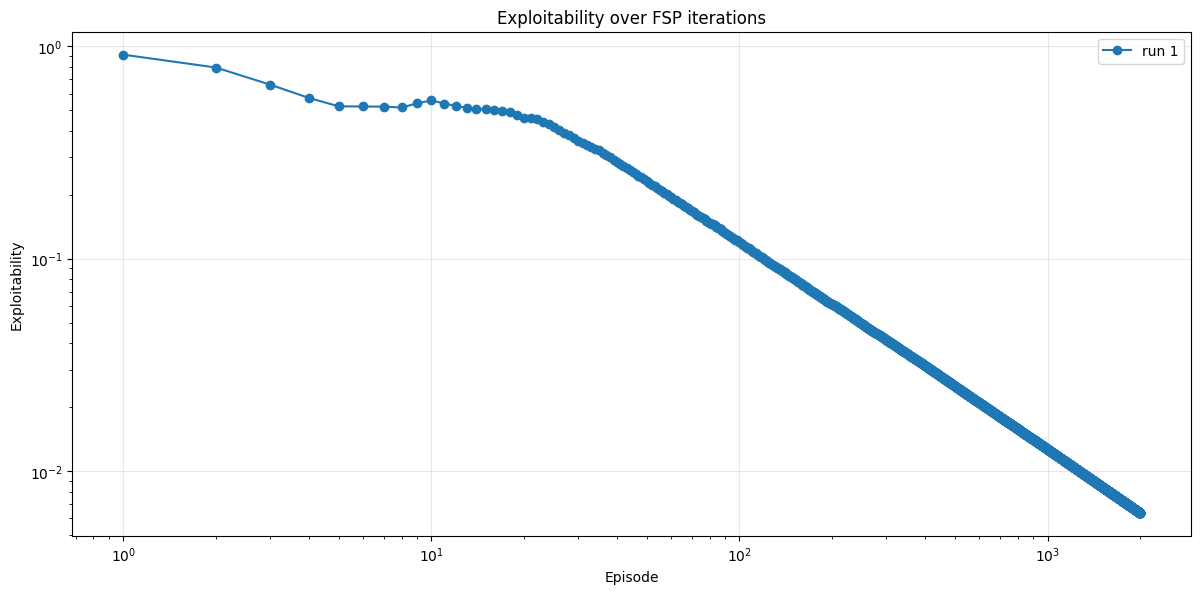

In [14]:
# ready

from datetime import datetime

time_right_now_string = datetime.now().strftime("%Y%m%d-%H%M%S")
spec = all_specs[25]

pol, info = dense_fsp_loop(spec=spec, episodes=2000, episodes_test=0, efficient=True)
plot_exploitability_series(info)

# info['exploitability_series'][99]

short_form = spec.to_short_str() + '___'
short_form += time_right_now_string
save_fsp_run(run_id=short_form, policy=pol, info=info, spec=spec)

In [15]:
short_form

'r7_s2_h1_hp_ss___20260102-163847'